<a href="https://colab.research.google.com/github/pkboom/metacode-machine-learning/blob/master/%5Bpractice%5D_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic setting
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/curinc/classification/

/content/drive/MyDrive/curinc/classification


# Support Vector Machine (SVM) 분류 모델

## [P.1] Maximal margin SVM

iris 붓꽃 데이터를 활용해 SVM의 이미지 분류 모델을 만들어볼 것임

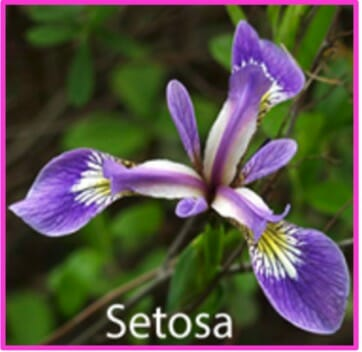

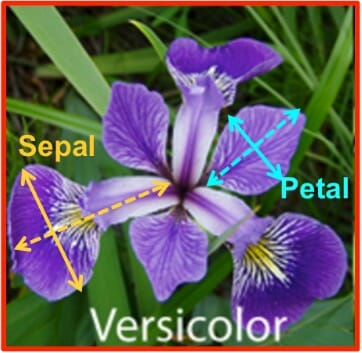

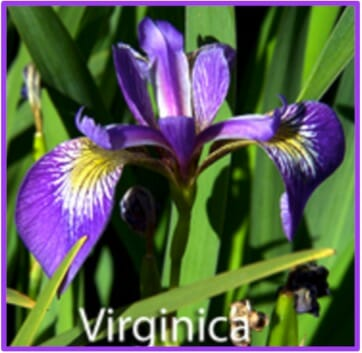

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

# 0, 1 : sepal length, sepal width
# 2, 3 : petal length, petal width
# iris['data'] is two dimensinal list, so, (: -> pull everything, (2,3) -> only grab column 2,3)
X = iris["data"][:, (2, 3)]  
y = iris["target"] # total: 150, Setosa:50, Versicolor:50, Virginica:50

# True + True = True, True + False = True, False + False = False
# 0: Setosa, 1: Versicolor
idx = (y == 0) + (y == 1)

X = X[idx]
y = y[idx]


위의 setosa 혹은 versicolor 품좀의 이진 클래스 분류를 위해, 데이터 중 `petal length`와 `petal width` 피처를 활용     
모델은 `sklearn`에서 제공하는 [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 클래스를 사용   
단, kernel 함수는 선형 함수인 SVM 모델로 사용할 것

In [ ]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC(kernel = 'linear')
svm_clf.fit(X, y)

SVC(kernel='linear')

In [ ]:
# trained parameters
# We can get coef_ and intercept_ because we used 'linear' kernel
print(svm_clf.coef_)
print(svm_clf.intercept_)

[[1.1 0.7]]
[-3.27999997]


In [ ]:
# support vector = 결정 경계에 영향을 미치는 샘플들
print(svm_clf.support_vectors_)

[[1.9 0.4]
 [3.  1.1]]


In [ ]:
def plot_decision_boundary(w, b, xmin, xmax):
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1

    # linspace(): xmin부터 xmax까지 200개를 쪼개었을때 값들
    # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
    x = np.linspace(xmin, xmax, 200)
    db = -w[0]/w[1] * x - b/w[1] # x1 of decision boundary 

    # We do this for visualization
    # arbitray number: 1(distance between decision hyperplance and margin hyperplane)
    # w0*x0 + w1*x1 + b = 1 
    # x1 = -w0/w1 * x0 - b/w1 + 1/w1 
    # See the difference between line 3 and line 12.
    # The difference(1/w1) is margin when f(x)=1
    margin = 1 / w[1]
    up = db + margin # create a bound for support vector
    down = db - margin # create a bound for support vector

    plt.plot(x, db, color='black')
    plt.plot(x, up, "--", color='black')
    plt.plot(x, down, "--", color='black')

In [ ]:
X[:, 0] # 100

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [ ]:
X[:, 0][y==0]

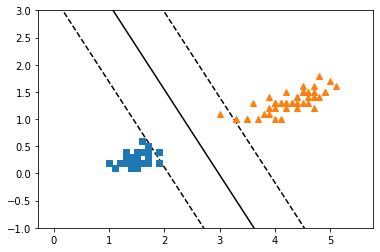

In [ ]:
plt.figure(figsize=(6, 4))

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]
    
# 결정 경계에 대한 시각화
plot_decision_boundary(w, b, 0, 5.5)

# 데이터셋 시각화
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s") # square
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
plt.ylim(-1, 3)

plt.show()

## [P.2] Soft Margin SVM

In [ ]:
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2)  # Iris-Virginica

`sklearn`에서는 [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)이란 클래스를 제공하며, 학습의 편이성을 매우 높여줌
해당 클래스는 다양한 하이퍼파라미터에 대해서 교차 검증을 진행할 때 필요한 여러 스텝을 묶어놓은 것으로 이해하면 됨   
필요한 argument는 학습에 사용될 모델과 데이터 전처리에 사용할 transforms가 있음

여기서는 [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 변환과 [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)(선형 커널 함수를 사용한 `SVC`와 동일하지만, 좀 더 다양한 손실 함수와 정규화를 사용할 수 있음) 모델을 사용

Pipe([...])

여기서는 첫번째로 전처리에 필요한 클래스를 넣어주고 그다음에는 모델을 선언해서 넣어줌

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
# Pipleline accepts a list.
# Each item in the list is a tuple. Format: ('some-name', Class)
svm_clf = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC(C=1))])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=1))])

하이퍼파라미터 `C`에 대해서 어떻게 동작하는지 확인하기

In [ ]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1) # C 1
svm_clf2 = LinearSVC(C=100) # C 100

pip_svm_clf1 = Pipeline([('scaler', scaler), ('svc', svm_clf1)])
pip_svm_clf2 = Pipeline([('scaler', scaler), ('svc', svm_clf2)])

pip_svm_clf1.fit(X, y)
pip_svm_clf2.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC(C=100))])

In [ ]:
# scaler
scaler.scale_, scaler.mean_
# 2 pipelines. So scale_, mean_ are an array containing 2 items

(array([1.75940407, 0.75969263]), array([3.758     , 1.19933333]))

위에서 구한 파라미터 w와 b는 `StandardScaler`가 적용된 z에 대한 선형 함수 (y = w z + b) 인 상황임    

In [ ]:
# z = (x-m)/s
m = scaler.mean_
s = scaler.scale_ 

z0 = (X[:, 0] - m[0]) / s[0]
z1 = (X[:, 1] - m[1]) / s[1]
# z0, z1: data after regularization

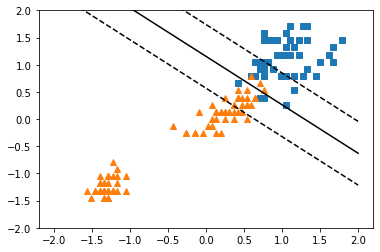

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf1.coef_[0]
b = svm_clf1.intercept_[0]
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

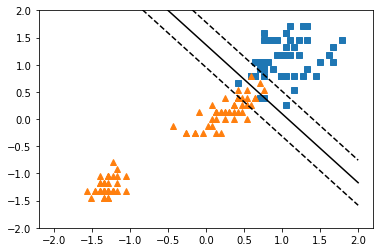

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(z0[y==1], z1[y==1], "s")
plt.plot(z0[y==0], z1[y==0], "^")

w = svm_clf2.coef_[0]
b = svm_clf2.intercept_[0]
plot_decision_boundary(w, b, -2, 2)
plt.ylim(-2, 2)
plt.show()

All vector inside margins are soft vectors.

The bigger C, the smaller the margins.

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

정규화 강도가 줄어들면 분산오류 커짐.

사이킷런의 SVM 모델은 `C` 하이퍼파라미터 값이 작아지면, 정규화의 강도가 더 세짐      
정규화 강도가 세진다는 말은 분산 오류가 줄어든다는 것이고, SVM에서 분산 오류를 줄어들게 하려면 마진의 폭이 커져야 함    
따라서 `C=1`일 때는 서포트 벡터의 수가 많고, 반대로 100의 값일 때는 수가 줄어든 모델이 학습됨

C가 작아지면 정규화가 커져서 분산오류가 작아지고 그래서 마진이 커짐. 결론적으로 대충 학습을 한다.

## [P.3] Non-linear SVM

비선형 데이터를 위해서 사이킷런의 [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) 데이터셋 활용

In [ ]:
from sklearn.datasets import make_moons

((100, 2), (100,))

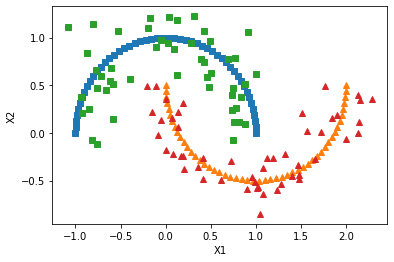

In [ ]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "s")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "^")
    
    plt.xlabel("X1")
    plt.ylabel("X2")

X, y = make_moons(n_samples=100, noise=0) # add noise
plot_dataset(X, y)
X, y = make_moons(n_samples=100, noise=0.2) # add noise
plot_dataset(X, y)
X.shape, y.shape

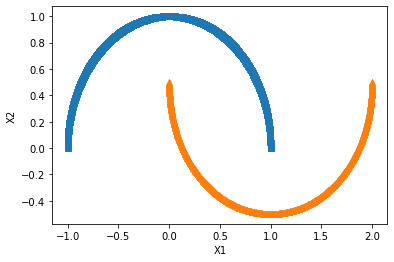

In [ ]:
X, y = make_moons(n_samples=1000, noise=0)
plot_dataset(X, y)


((1000, 2), (1000,))

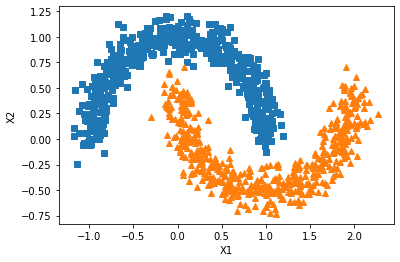

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.1)
plot_dataset(X, y)
X.shape, y.shape

모델로는 일전에 사용했던 `SVC` 클래스를 사용하지만, polynomial 커널 함수로 설정하기     
3차 커널 함수를 예시로 코드를 구현하고 학습시키기

In [ ]:
from sklearn.svm import SVC

# coef0 argument controls how much the model is influenced by high-degree polynomials

# degree=3: 3차함수
# coef0=10: 가장 높은 차수에 얼마만큼의 계수를 줄것인가
poly3_svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='poly', degree=3, coef0=10, C=5))]) 
poly3_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, kernel='poly'))])

In [ ]:
poly10_svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='poly', degree=10, coef0=10, C=5))]) 
poly10_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, degree=10, kernel='poly'))])

In [ ]:
x0 = np.linspace(-3, 3, 100)
x1 = np.linspace(-3, 3, 100)

x0, x1 = np.meshgrid(x0, x1)
x0, x1, x0.ravel(), x0.shape

(array([[-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        ...,
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ],
        [-3.        , -2.93939394, -2.87878788, ...,  2.87878788,
          2.93939394,  3.        ]]),
 array([[-3.        , -3.        , -3.        , ..., -3.        ,
         -3.        , -3.        ],
        [-2.93939394, -2.93939394, -2.93939394, ..., -2.93939394,
         -2.93939394, -2.93939394],
        [-2.87878788, -2.87878788, -2.87878788, ..., -2.87878788,
         -2.87878788, -2.87878788],
        ...,
        [ 2.87878788,  2.87878788,  2.87878788, ...,  

In [ ]:
asdf = np.c_[x0.ravel(), x1.ravel()]
asdf

array([[-3.        , -3.        ],
       [-2.93939394, -3.        ],
       [-2.87878788, -3.        ],
       ...,
       [ 2.87878788,  3.        ],
       [ 2.93939394,  3.        ],
       [ 3.        ,  3.        ]])

In [ ]:
def plot_predictions(clf):
    x0 = np.linspace(-3, 3, 100)
    x1 = np.linspace(-3, 3, 100)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X)
    y_pred = y_pred.reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.1) # 등고선 같은 것

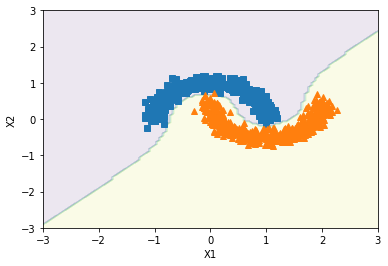

In [ ]:
# x0 = np.linspace(-3, 3, 100)
# x1 = np.linspace(-3, 3, 100)
# x0, x1 = np.meshgrid(x0, x1)
# X = np.c_[x0.ravel(), x1.ravel()]
# print(X, X.shape)

# y_pred = poly3_svm_clf.predict(X)
# print(y_pred, y_pred.shape)
# y_pred = y_pred.reshape(x0.shape)
# print(x0.shape, y_pred, y_pred.shape)
# plt.contourf(x0, x1, y_pred, alpha=0.1) # 등고선 같은 것

plt.figure(figsize=(6, 4))
plot_predictions(poly3_svm_clf)
plot_dataset(X, y)
plt.show()

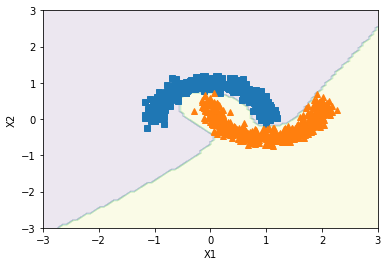

In [ ]:
plt.figure(figsize=(6, 4))

plot_predictions(poly10_svm_clf)
plot_dataset(X, y)
plt.show()

커널 함수가 좀더 비선형 함수가 되면서, 학습 데이터셋에 오버피팅 되는 경향을 볼 수 있음

이번에는 polynomial 커널 함수가 아닌, rbf 커널 함수를 사용해서 학습하기 

In [ ]:
# 비선형에서는 gamma 씀, poly에서는 coef0 씀
rbf_svm_clf = Pipeline([('scale', StandardScaler()), ('svc', SVC(kernel='rbf', gamma=5, C=5))]) 

rbf_svm_clf.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('svc', SVC(C=5, gamma=5))])

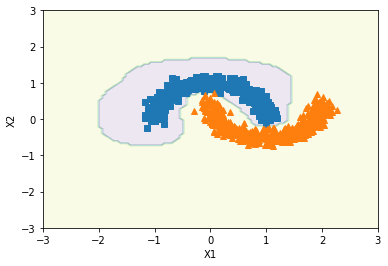

In [ ]:
plt.figure(figsize=(6, 4))

plot_predictions(rbf_svm_clf)
plot_dataset(X, y)
plt.show()